In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [5]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

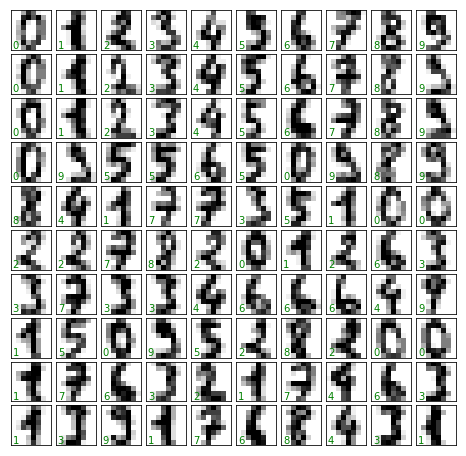

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')

In [15]:
X = digits.data

In [16]:
X.shape

(1797, 64)

In [17]:
y = digits.target

In [18]:
y.shape

(1797,)

In [19]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

In [20]:
data_projected = iso.transform(digits.data)

In [21]:
data_projected.shape

(1797, 2)

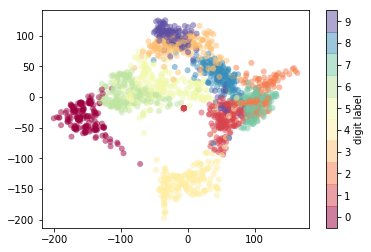

In [25]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target,edgecolors='none',alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)

In [28]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=0)

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

Text(91.68,0.5,'true value')

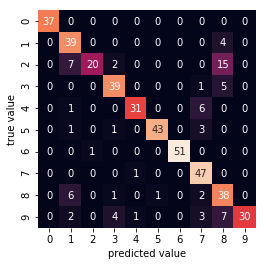

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest,y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [36]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [39]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model,X,y,cv=LeaveOneOut(len(X)))
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [43]:
np.random.randn(10)

array([ 0.14033271,  1.11827469,  1.01350169,  0.77189183,  1.51794419,
       -0.98159764,  0.75140916, -2.30184637, -0.85648836,  0.44648879])

In [48]:
pipeline?

Object `pipeline` not found.


In [59]:
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [56]:
def make_data(N,err=1.0,rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1)**2
    y = 10 - 1./(X.ravel()+0.1)
    if err > 0:
        y+=err*rng.randn(N)
    return X,y
X,y = make_data(40)

In [52]:
sns.set()

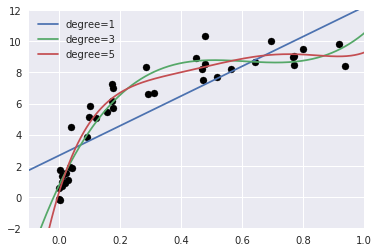

In [60]:
X_test = np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y,color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

In [65]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0,21)
train_score,val_score = validation_curve(PolynomialRegression(),X,y,'polynomialfeatures__degree',degree,cv=7)
train_score.shape

(21, 7)

Text(0,0.5,'score')

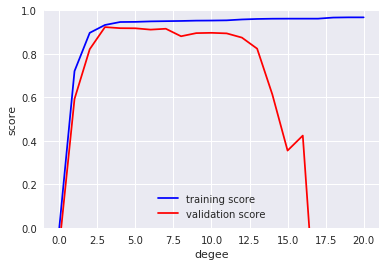

In [64]:
plt.plot(degree,np.median(train_score,1),color='blue',label='training score')
plt.plot(degree,np.median(val_score,1),color='red',label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degee')
plt.ylabel('score')

(-0.05837591284348665,
 0.9959064049396961,
 -0.7485237455039975,
 10.92057542617113)

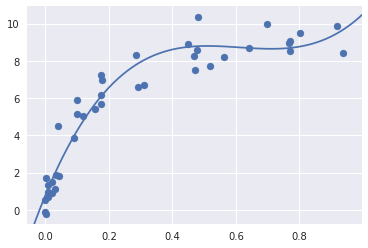

In [67]:
plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)